In [1]:
from pydynverse.wrap import wrap_expression, infer_trajectory, add_dimred
from pydynverse.methods import ti_comp1, ti_slingshot
from pydynverse.plot import plot_dimred
from pydynverse.dimred import dimred_mds

from pydynverse import logger

logger.setLevel("DEBUG")

In [2]:
# 1. 准备数据(wrap)
# 运行R脚本获得数据，为R对象
import rpy2.robjects as ro
r_script = """
library(dyno)
data("fibroblast_reprogramming_treutlein")
fibroblast_reprogramming_treutlein
"""
fibroblast_reprogramming_treutlein = ro.r(r_script)

# 封装数据
dataset = wrap_expression(
    counts=fibroblast_reprogramming_treutlein.rx2["counts"],
    expression=fibroblast_reprogramming_treutlein.rx2["expression"]
)
logger.info(f"AnnData dataset:\n{dataset}")
logger.info("Dataset loading finished")

R[write to console]: 载入需要的程辑包：dynfeature

R[write to console]: 载入需要的程辑包：dynguidelines

R[write to console]: 载入需要的程辑包：dynmethods

R[write to console]: 载入需要的程辑包：dynplot

R[write to console]: 载入需要的程辑包：dynwrap



[2024年11月24日 19时03分40秒] DEBUG    Resolving cell_ids and feature_ids                                          
                        DEBUG    Dataset created: {'id': '20241124_190340__data_wrapper__lTc335NDtQ', 'cell_ids':  
                                 array(['1_iN1_C01', '1_iN1_C02', '1_iN1_C03', '1_iN1_C04', '1_iN1_C05',           
                                        '1_iN1_C07', '1_iN1_C08', '1_iN1_C09', '1_iN1_C10', '1_iN1_C11',           
                                        '1_iN1_C12', '1_iN1_C13', '1_iN1_C14', '1_iN1_C15', '1_iN1_C16',           
                                        '1_iN1_C17', '1_iN1_C19', '1_iN1_C20', '1_iN1_C21', '1_iN1_C22',           
                                        '1_iN1_C23', '1_iN1_C25', '1_iN1_C26', '1_iN1_C27', '1_iN1_C29',           
                                        '1_iN1_C30', '1_iN1_C31', '1_iN1_C33', '1_iN1_C34', '1_iN1_C35',           
                                        '1_iN1_C36', '1_iN1_C37', '1_iN1_C38',

In [3]:
# 2. 选择方法(method)
methods_selected = [ti_comp1(), ti_slingshot()]
logger.info(f"Methods {methods_selected} selecting finished")

                        DEBUG    Docker image(dynverse/ti_comp1:v0.9.9.01) loaded                                  
                        DEBUG    Docker image(dynverse/ti_slingshot:v1.0.3) loaded                                 
                        INFO     Methods [<Image: 'dynverse/ti_comp1:v0.9.9.01'>, <Image:                          
                                 'dynverse/ti_slingshot:v1.0.3'>] selecting finished                               


In [ ]:
# 3. 运行方法(wrap)
model = infer_trajectory(dataset, methods_selected[0])
logger.info(f"Methods executing finished, model: {model}")

                        DEBUG    Temp wd: /tmp/tmpr3o402xg                                                         
[2024年11月24日 19时03分41秒] DEBUG    Save json successfully, path: /tmp/tmpr3o402xg/input.json                   


                        INFO     Coloring by grouping                                                              


TypeError: concat() got an unexpected keyword argument 'c'

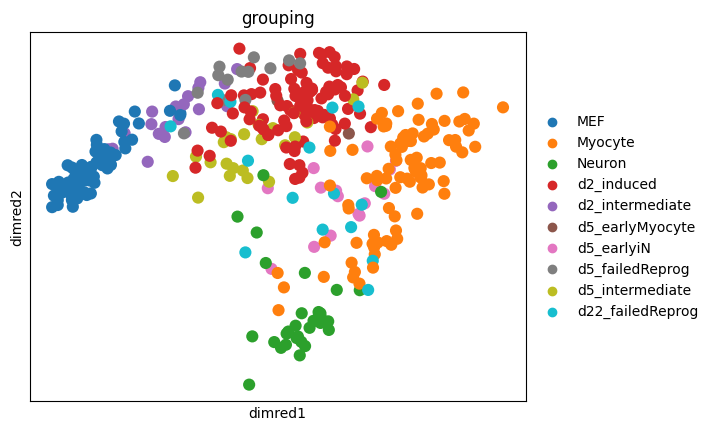

In [ ]:
# 4. 绘制轨迹(dimred+plot)
# model = add_dimred(model, dimred_mds,  expression_source=dataset["expression"])  # 提取降维结果, docker输出容器
plot_dimred(model, expression_source=dataset["expression"], grouping=list(fibroblast_reprogramming_treutlein.rx2["grouping"]))
logger.info("Result plotting finished")